<a href="https://colab.research.google.com/github/sankeawthong/Project-1-Lita-Chatbot/blob/main/Inbestigation%20in%20model%20robustness_APA_DDoS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

In [2]:
# Load dataset
dataset = pd.read_csv("dataset_APA_DDoS.csv")
dataset.isnull().sum()

ip.src_label       0
ip.dst_label       0
tcp.srcport        0
tcp.dstport        0
ip.proto           0
frame.len          0
tcp.flags.syn      0
tcp.flags.reset    0
tcp.flags.push     0
tcp.flags.ack      0
ip.flags.mf        0
ip.flags.df        0
ip.flags.rb        0
tcp.seq            0
tcp.ack            0
Packets            0
Bytes              0
Tx Packets         0
Tx Bytes           0
Rx Packets         0
Rx Bytes           0
Class              0
dtype: int64

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151200 entries, 0 to 151199
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   ip.src_label     151200 non-null  int64
 1   ip.dst_label     151200 non-null  int64
 2   tcp.srcport      151200 non-null  int64
 3   tcp.dstport      151200 non-null  int64
 4   ip.proto         151200 non-null  int64
 5   frame.len        151200 non-null  int64
 6   tcp.flags.syn    151200 non-null  int64
 7   tcp.flags.reset  151200 non-null  int64
 8   tcp.flags.push   151200 non-null  int64
 9   tcp.flags.ack    151200 non-null  int64
 10  ip.flags.mf      151200 non-null  int64
 11  ip.flags.df      151200 non-null  int64
 12  ip.flags.rb      151200 non-null  int64
 13  tcp.seq          151200 non-null  int64
 14  tcp.ack          151200 non-null  int64
 15  Packets          151200 non-null  int64
 16  Bytes            151200 non-null  int64
 17  Tx Packets       151200 non-n

In [4]:
dataset["Class"].unique()

array([0, 1, 2])

In [29]:
encoder = LabelEncoder()
y = encoder.fit_transform(dataset['Class'])
y = to_categorical(y, num_classes=3)

In [30]:
X = dataset.drop(['Class'], axis=1)
X = X.values
print(X.shape)
print(y.shape)

(151200, 21)
(151200, 3)


In [31]:
encoder = LabelEncoder()
y = encoder.fit_transform(dataset['Class'])
num_classes = len(encoder.classes_)
X = dataset.drop(['Class'], axis=1)
X = X.values

In [32]:
# Data preprocessing
counter = Counter(y)
print(counter)

Counter({1: 75600, 0: 37800, 2: 37800})


In [7]:
#Installing imblearn
!pip install -U imbalanced-learn
!pip install imbalanced-learn

In [33]:
# Data preprocessing
y = dataset['Class'].values
X = dataset.drop(['Class'],axis=1)
X=X.values
print(X)
print(y)

[[    0     0  2412 ...   216     4   216]
 [    0     0  2413 ...   270     5   270]
 [    0     0  2414 ...   324     6   324]
 ...
 [   13     0 37364 ...   560     4   584]
 [   13     0 37366 ...   560     4   615]
 [   13     0 37368 ...   560     4   586]]
[0 0 0 ... 1 1 1]


In [34]:
import collections as c
counter = c.Counter(y)
print(counter)

Counter({1: 75600, 0: 37800, 2: 37800})


In [18]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler()
X, y = oversample.fit_resample(X, y)
counter = c.Counter(y)
print(counter)

Counter({0: 75600, 1: 75600, 2: 75600})


In [35]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
counter = c.Counter(y)
print(counter)

Counter({0: 75600, 1: 75600, 2: 75600})


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [37]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, TimeDistributed
from tensorflow.keras.regularizers import l2
import numpy as np

# Train RF model
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

# Extract features from RF model
train_rf_features = rf_model.predict(X_train)
test_rf_features = rf_model.predict(X_test)

# Reshape the RF features for LSTM input
train_rf_features = np.reshape(train_rf_features, (train_rf_features.shape[0], 1, 1))
test_rf_features = np.reshape(test_rf_features, (test_rf_features.shape[0], 1, 1))

# Reshape the RF features for LSTM input
##train_rf_features = np.reshape(train_rf_features, (train_rf_features.shape[0], 1, train_rf_features.shape[1]))
##test_rf_features = np.reshape(test_rf_features, (test_rf_features.shape[0], 1, test_rf_features.shape[1]))

In [38]:
# Build the LSTM model with the correct output shape
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(1, train_rf_features.shape[2]), return_sequences=True, kernel_regularizer=l2(0.001)))
lstm_model.add(Dropout(0.5))
lstm_model.add(LSTM(32, return_sequences=True, kernel_regularizer=l2(0.001)))
lstm_model.add(Dropout(0.5))
lstm_model.add(LSTM(16, kernel_regularizer=l2(0.001)))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(num_classes, activation='softmax'))

lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

y_train = to_categorical(y_train, num_classes=num_classes)  # One-hot encode y_train

history = lstm_model.fit(train_rf_features, y_train, epochs=15, batch_size=64, validation_split=0.2)

# Evaluate the hybrid model on the test set
test_lstm_features = lstm_model.predict(test_rf_features)
test_rf_lstm_predictions = np.argmax(test_lstm_features, axis=1)

Epoch 1/15
2268/2268 [==============================] - 19s 6ms/step - loss: 0.1854 - accuracy: 0.9567 - val_loss: 0.0354 - val_accuracy: 1.0000
Epoch 2/15
2268/2268 [==============================] - 14s 6ms/step - loss: 0.0388 - accuracy: 0.9976 - val_loss: 0.0200 - val_accuracy: 1.0000
Epoch 3/15
2268/2268 [==============================] - 13s 6ms/step - loss: 0.0251 - accuracy: 0.9977 - val_loss: 0.0132 - val_accuracy: 1.0000
Epoch 4/15
2268/2268 [==============================] - 13s 6ms/step - loss: 0.0186 - accuracy: 0.9981 - val_loss: 0.0099 - val_accuracy: 1.0000
Epoch 5/15
2268/2268 [==============================] - 13s 6ms/step - loss: 0.0147 - accuracy: 0.9988 - val_loss: 0.0079 - val_accuracy: 1.0000
Epoch 6/15
2268/2268 [==============================] - 13s 6ms/step - loss: 0.0122 - accuracy: 0.9993 - val_loss: 0.0069 - val_accuracy: 1.0000
Epoch 7/15
2268/2268 [==============================] - 12s 6ms/step - loss: 0.0103 - accuracy: 0.9994 - val_loss: 0.0061 - val_ac

Confusion Matrix:
[[15085     0     0]
 [    0 15075     0]
 [    0     0 15200]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15085
           1       1.00      1.00      1.00     15075
           2       1.00      1.00      1.00     15200

    accuracy                           1.00     45360
   macro avg       1.00      1.00      1.00     45360
weighted avg       1.00      1.00      1.00     45360



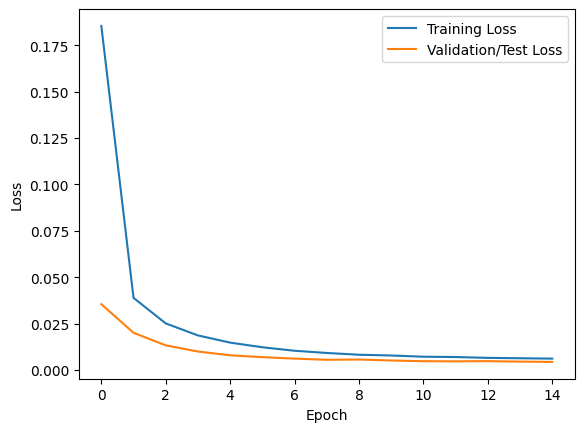

In [44]:
import collections as c

# Calculate the confusion matrix and classification report
# Ensure that y_test and test_rf_lstm_predictions are 2D arrays
confusion = confusion_matrix(y_test, test_rf_lstm_predictions)
classification_report_result = classification_report(y_test, test_rf_lstm_predictions)

# Print the confusion matrix and classification report
print("Confusion Matrix:")
print(confusion)
print("\nClassification Report:")
print(classification_report_result)

# Plot the training and validation loss over each epoch
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation/Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

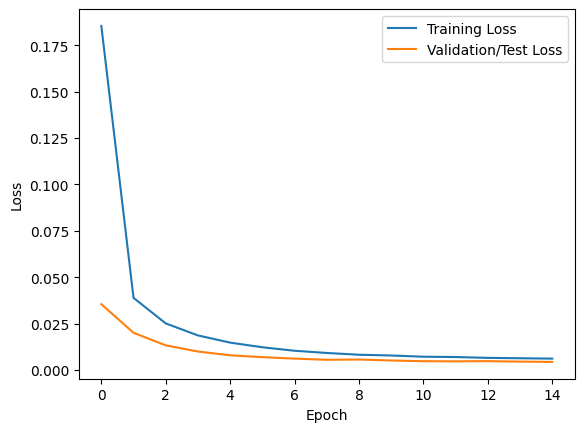

In [45]:
# Plot training/validation loss over each epoch
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation/Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [48]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, test_rf_lstm_predictions)
recall = recall_score(y_test, test_rf_lstm_predictions, average='weighted')
precision = precision_score(y_test, test_rf_lstm_predictions, average='weighted')
f1score = f1_score(y_test, test_rf_lstm_predictions, average='weighted')
confusion_mat = confusion_matrix(y_test, test_rf_lstm_predictions)
classification_rep = classification_report(y_test, test_rf_lstm_predictions)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1-Score:", f1score)
print("Confusion Matrix:\n", confusion_mat)
print("Classification Report:\n", classification_rep)

Accuracy: 1.0
Recall: 1.0
Precision: 1.0
F1-Score: 1.0
Confusion Matrix:
 [[15085     0     0]
 [    0 15075     0]
 [    0     0 15200]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15085
           1       1.00      1.00      1.00     15075
           2       1.00      1.00      1.00     15200

    accuracy                           1.00     45360
   macro avg       1.00      1.00      1.00     45360
weighted avg       1.00      1.00      1.00     45360



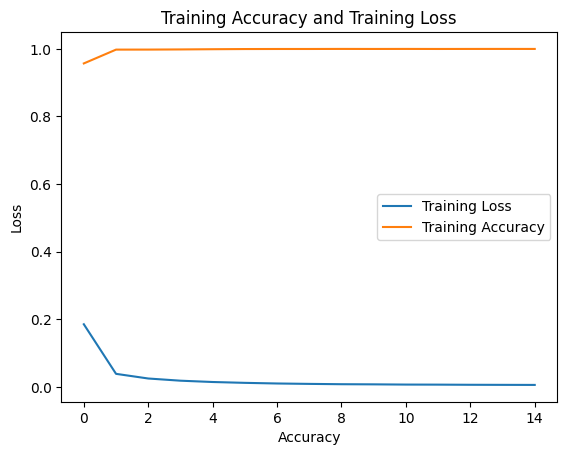

In [49]:
# Plot training loss and validation/test loss over each epoch of training
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy and Training Loss')
plt.xlabel('Accuracy')
plt.ylabel('Loss')
plt.legend()

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def conf_mat(d1,d2):
  cm = confusion_matrix(d1, d2)
  plt.figure(figsize=(6,5.5))
  ax = sns.heatmap(cm,  fmt='2', annot=True, cmap='copper')
  sns.set(font_scale=1)

  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values\n');
  ax.xaxis.set_ticklabels(['DDoS-PSH-ACK','Benign','DDoS-ACK'])
  ax.yaxis.set_ticklabels(['DDoS-PSH-ACK','Benign','DDoS-ACK'])
  ##plt.xticks(rotation=45)  # Add this line to rotate the x-axis labels by 45 degrees
  ##plt.yticks(rotation=45)  # Add this line to rotate the x-axis labels by 45 degrees
  plt.tight_layout()
  # plt.savefig("F1.eps", format = 'eps')
  plt.show()

Confusion Matrix of Hybrid RF-LSTM Model


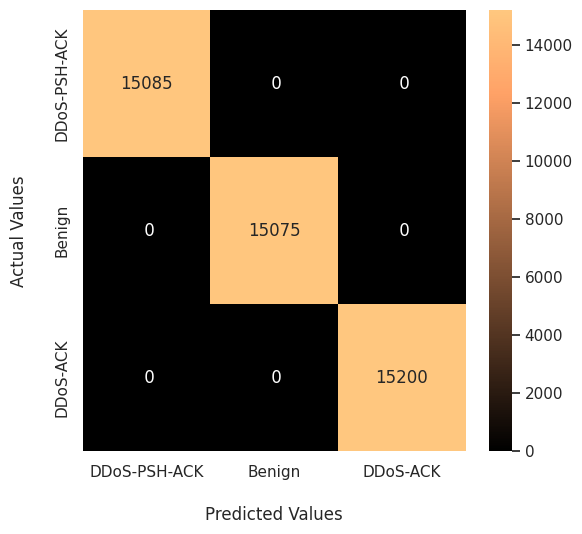

In [54]:
print("Confusion Matrix of Hybrid RF-LSTM Model")
conf_mat(y_test, test_rf_lstm_predictions)

In [56]:
report = classification_report(y_test, test_rf_lstm_predictions, output_dict=True)
detection_rates = {}
for cls in range(3):
    detection_rates[encoder.inverse_transform([cls])[0]] = report[str(cls)]['recall']
print("Detection rates of Hybrid RF-LSTM Model:", detection_rates)

Detection rates of Hybrid RF-LSTM Model: {0: 1.0, 1: 1.0, 2: 1.0}


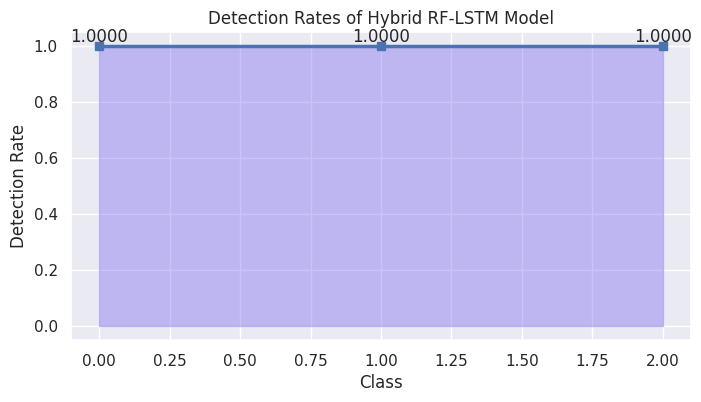

In [57]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

report = classification_report(y_test, test_rf_lstm_predictions, output_dict=True)
detection_rates = {}
for cls in range(3):
    detection_rates[encoder.inverse_transform([cls])[0]] = report[str(cls)]['recall']

# Extract the class labels and detection rates
labels = list(detection_rates.keys())
rates = list(detection_rates.values())

# Plot the line graph with filled area and labels
plt.figure(figsize=(8, 4))
plt.plot(labels, rates, marker='s', linestyle='-', linewidth=2.5)
plt.fill_between(labels, rates, color='mediumslateblue', alpha=0.4)

# Add labels to each data point
for i in range(len(labels)):
    plt.text(labels[i], rates[i], "{:.4f}".format(rates[i]), ha='center', va='bottom')

plt.xlabel('Class')
plt.ylabel('Detection Rate')
plt.title('Detection Rates of Hybrid RF-LSTM Model')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

In [64]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
#from keras.utils import np_utils
from tensorflow.python.keras.utils import np_utils

from pandas.api.types import CategoricalDtype
# Convert y_test and test_rf_lstm_predictions to one-hot encoded format

#classification_report(y_test, test_rf_lstm_predictions, output_dict=True)


y_test_onehot = np_utils.to_categorical(y_test, axis=1)
test_rf_lstm_predictions_onehot = np_utils.to_categorical(test_rf_lstm_predictions, num_classes=3)  # Convert to one-hot encoded format with 10 classes

# Compute the AUC and ROC curves for each class
n_classes = y_test_onehot.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_onehot[:, i], test_rf_lstm_predictions_onehot[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_onehot.ravel(), test_rf_lstm_predictions_onehot.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot the ROC curves
plt.figure()
colors = ['blue', 'red', 'green']  # Adjust the colors as needed
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class {0} (AUC = {1:0.6f})'.format(i, roc_auc[i]))

# Plot the micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"], color='black', lw=2, linestyle='--', label='Micro-average (AUC = {0:0.6f})'.format(roc_auc["micro"]))

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

TypeError: ignored